In [6]:
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [7]:
iris = datasets.load_iris()

print(iris.data)
X = iris.data[:,2:4]# we only take the first two features.
print(X)

y = iris.target
print(list(iris.target_names))

print(y)
y[y==1] = 0 #setosa', 'versicolor - > 0
y[y==2] = 1 #virginica
print(y)






[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    ax = ax or plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    X,Y = np.meshgrid(x,y)
    xy = np.column_stack([X.ravel(),Y.ravel()])
    v = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,v,colors='k',
              levels=[-1,0,1],alpha=0.5,
              linestyles=['--','-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300,lw=1,edgecolor='black',color='none')
        

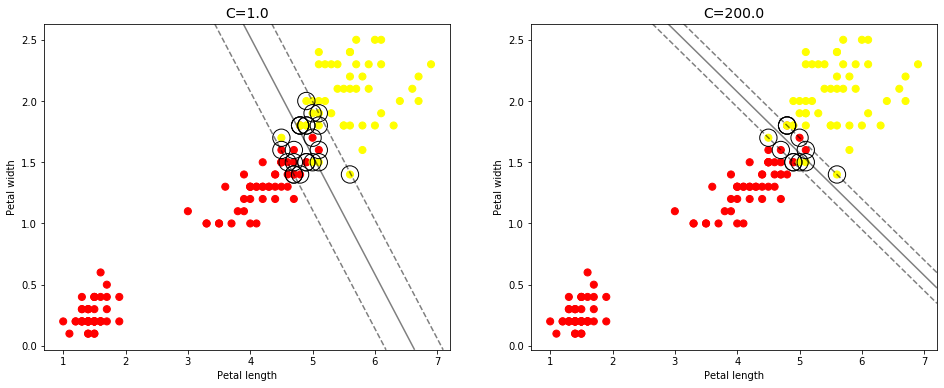

In [9]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
                      
for axi,C in zip(ax,[1,200.0]):
    model = SVC(kernel='linear',C=C).fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    plot_svc_decision_function(model,axi)
    axi.set_title(f'C={C:.1f}',size=14)
    
    axi.set_xlabel('Petal length')
    axi.set_ylabel('Petal width')


        

                 

